## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
#I calculated porportion by using users converted and divided it total number of users
proportion = df.query('converted == 1').shape[0]/df.shape[0]
proportion

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#I set the new page and treatment columns to variables and calculated the users that aren't matching
treatmt = df.query('group == "treatment"')
new_pg = df.query('landing_page == "new_page"')

treat = treatmt.query('landing_page == "new_page"')
unmatching = treatmt.shape[0] - treat.shape[0]
unmatching

1965

In [7]:
#Calculated the difference for unmatching data
new_p = new_pg.query('group == "treatment"')
unmatching2 = new_pg.shape[0] - new_p.shape[0]
unmatching2

1928

In [8]:
#Final resualt for mismatching data 
mismatching = unmatching + unmatching2
mismatching

3893

f. Do any of the rows have missing values?

In [9]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
#Removed data that doesn't match
df_remove = df.drop(df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')].index)
df2 = df_remove.drop(df_remove[(df_remove['group'] == 'control') & (df_remove['landing_page'] == 'new_page')].index)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [12]:
df2.shape

(290585, 5)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#Check for duplicated user
dup = df2.user_id.duplicated()
df2[dup].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
dup_row = df2[dup]
dup_row

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
#Removed row of repeated data
df2.drop([2893], inplace = True)

In [17]:
#Check if row was removed
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
#Used the total amount of coverted users for this calculation 
convert = df2.query('converted == 1')
prob = convert.shape[0]/df2.shape[0]
prob

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [32]:
#Used the converted users in the control group
cntrol = df2.query('group == "control"')
prob_cntrl = cntrol.query('converted == 1').shape[0]/cntrol.shape[0]
prob_cntrl

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
#Used the converted users in the treatment group
treat_1 = df2.query('group == "treatment"')
prob_treat = treat_1.query('converted == 1').shape[0]/treat_1.shape[0]
prob_treat

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
#Used the total amount of new_page users for this calculation 
newpg = df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]
newpg

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<b>Answer</b>

I calculated the probability of the following variables to see whether the new treatment page leads to more conversions. 
- Probability of a user converting on all pages
- Probability of a user converting in the control group
- Probability of a user converting in the treatment group

In all the three instances, the probability of conversion is ~12%, this information tells us that we do not have enough evidence indicating that the new treatment page leads to more conversions.

Moreover, we also calculate the probability of a user landing on the treatment page, and it's ~50%, therefore suggesting that there is no bias based on the number of users.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

The null hypothesis is that the probability of the conversion rates for the old and the new pages are equal

$H_{null}$: $p_{old}$ = $p_{new}$

The alternative hypothesis is that the probability of conversion for the new page is greater than the probability of conversion for the old page.

$H_{alt}$: $p_{old}$ < $p_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
convrt = df2.query('converted == 1')
p_new = convrt.shape[0]/df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
#this is the same as the above, because both rates are the same under the null 
convrt2 = df2.query('converted == 1')
p_old = convrt2.shape[0]/df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [24]:
#Put down n_new for the treatment group
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [25]:
##Put down n_old for the control group
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.choice(2,n_new, p=[p_new,1-p_new])
new_page_converted.mean()

0.8810474158695203

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.choice(2,n_old, p=[p_old,1-p_old])
old_page_converted.mean()

0.8802332144774702

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
new_page_converted.mean() - old_page_converted.mean()

0.000814201392050129

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
p_diffs = []
size = 10000
for _ in range(10000):
    new_page_converted = np.random.choice(2,n_new, p=[p_new,1-p_new]).mean()
    old_page_converted = np.random.choice(2,n_old, p=[p_old,1-p_old]).mean()
    diff = new_page_converted - old_page_converted
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

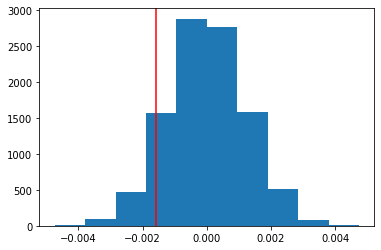

In [33]:
p_diffs = np.array(p_diffs)
obs_diff = prob_treat - prob_cntrl
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
(p_diffs > obs_diff).mean()

0.906

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

$H_{null}$: $p_{old}$ = $p_{new}$

To prove the alternate hypothesis we need to show that the conversion rate from new is greater than the conversion rate from the old, with a p value of 0.05

$H_{alt}$: $p_{old}$ < $p_{new}$.

However, based on this analysis and the value computed in part j, we see a p value of 0.90, and therefore we cannon disprove the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = df2.query('group == "control"').converted.size
n_new = df2.query('group == "treatment"').converted.size

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [39]:
z_score,p_val = sm.stats.proportions_ztest(np.array([convert_new,convert_old]), np.array([n_new,n_old]),  alternative='larger')

print('z-score is '+ str(z_score))
print('p-value is ' + str(p_val))

z-score is -1.3109241984234394
p-value is 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

- z-score is -1.3109241984234394
- p-value is 0.9050583127590245

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
df2['intercept'] = 1

df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Sep 2020   Pseudo R-squ.:               8.077e-06
Time:                        18:55:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**


The p-value calculated using the regression model is 0.190. This is very different from the p-value of 0.90 calculated in section 2.

In section 2, our null hypothesis was that there is no difference between the probability of a user converting from the control or treatment group, and the alternative hypothesis was that the probability of a user converting from the treatment group was higher than the control grou.

In the regression model, our null hypothesis is that there is no correlation between the user converting and the group. The alternative hypothesis is that there is a positive correlation between the user conversion and the treatment group.

In section 2, we are looking at the difference in the probabilities of conversion between the two groups by random sampling, whereas in section 3, we are looking at direct correlation, and this may lead to the diffences observed.

However, in both the cases, the alpha p-value is 0.05 to disprove the null hypothesis, and in both cases, our p-value is much greater, therefore we cannot disprove the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

The p-value calculated using the regression model is 0.190. This is very different from the p-value of 0.90 calculated in section 2.

In section 2, our null hypothesis was that there is no difference between the probability of a user converting from the control or treatment group, and the alternative hypothesis was that the probability of a user converting from the treatment group was higher than the control grou.

In the regression model, our null hypothesis is that there is no correlation between the user converting and the group. The alternative hypothesis is that there is a positive correlation between the user conversion and the treatment group.

In section 2, we are looking at the difference in the probabilities of conversion between the two groups by random sampling, whereas in section 3, we are looking at direct correlation, and this may lead to the diffences observed.

However, in both the cases, the alpha p-value is 0.05 to disprove the null hypothesis, and in both cases, our p-value is much greater, therefore we cannot disprove the null hypothesis.

However, one maybe careful when adding additional terms to regression.

The terms must be chosen carefully. For example, we are analyzing a customer behavior on two different web-pages for an email client. In this case, adding a factor of pet ownership may not be the best idea.

Sometimes adding too many parameters can be time consuming and may return unclear results.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [ ]:
#Join datasets
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [43]:
#Read in the country file and check if it joined correctly
df_c = pd.read_csv('countries.csv')
df_c.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [44]:
#Merge datasets 
df_final = pd.merge(df2,df_c,on='user_id')
df_final.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [45]:
df_final.info()

#Find out the unique values in the country column
df_final.country.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290583
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
 5   intercept     290584 non-null  int64 
 6   ab_page       290584 non-null  uint8 
 7   country       290584 non-null  object
dtypes: int64(3), object(4), uint8(1)
memory usage: 18.0+ MB


array(['US', 'CA', 'UK'], dtype=object)

In [46]:
#Get dummy variables for the three countries and append to the database
df_final[['US','CA','UK']] = pd.get_dummies(df_final['country'])

#Check for the new columns
df_final.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [47]:
#Fit a logistic regression model 
log_mod = sm.Logit(df_final['converted'], df_final[['intercept','ab_page', 'US', 'CA']])
results_2 = log_mod.fit()
#Check the results
results_2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 06 Sep 2020   Pseudo R-squ.:               2.323e-05
Time:                        18:58:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
CA             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [48]:
#Check the relationship of the coefficients for the different countries 
#US vs UK and CA vs UK
np.exp(-0.0408),np.exp(0.0099)

(0.9600211149716509, 1.0099491671175422)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

<b>Summary</b>

In this section, we use a logistic regression model to check if the user conversion is affected by the landing page and the country.

We have users in the three countries USA, UK and Canada (CA). For this analysis, we use UK as the base country, i.e. the regression results for US and CA are compared to UK.

For this analysis, following steps were taken

- Import the countries data
- Merge the two databases, and check if they have merged
- Create dummy variables for the countries
- Perform a logistic regression
- Offer Observations

As in the previous case, we see that the ab_page does not have a statistically significant effect on the conversion (z = -1.3, p = 0.19).
To analyze how the countries may affect the conversion rate, we exponentiate the coefficients for US and CA to find comparision vs. UK. Based on the coeffiencients, we find
Users in US are 4% less likely to convert compared to users in UK
Users in CA are 1% more likely to convert compared to users in UK
In each case, the p-value is very high (US = 0.13; CA = 0.46) indicating that these changes are not statisitcally significant.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

Provide the summary results, and your conclusions based on the results.


In [49]:
#Add new country columns that mirror ab_page's data by multiplying it with the countries
df_final['US_page'] = df_final['US']*df_final['ab_page']
df_final['CA_page'] = df_final['CA']*df_final['ab_page']
df_final['UK_page'] = df_final['UK']*df_final['ab_page']
df_final.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA,UK,US_page,CA_page,UK_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1,0,0,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0,1,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1,0,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0,1,0,0


In [50]:
log_mod = sm.Logit(df_final['converted'], df_final[['intercept', 'ab_page','US','US_page','CA','CA_page']])
results_log = log_mod.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 06 Sep 2020   Pseudo R-squ.:               3.482e-05
Time:                        18:59:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
US            -0.0175      0.038     -0.465      0.642      -0.091       0.056
US_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
CA            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

<b>Summary</b>

After adding the interaction columns with the ab_page and the countries, I performed logistic regression. However, even in this case, the correlation between the variables was unclear. Moreover, due to the interaction between the variables, it became more challenging to analyze how a particular variable affects the conversion itself. Therefore, it is probably best to not use interaction between the page and the country for this regression analysis.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.